# Проект для платформы repetit

## Описание

Сервис передает контакты клиента (ученика) репетитору. Если репетитор начинает заниматься с учеником, то он должен платить сервису комиссию от каждого занятия. 

В реальности так происходит не всегда. 

Этому есть разные причины, например:

* Репетитор звонит по телефону и ему просто не отвечают; 
* Репетитор плохо договаривается о занятиях;
* Репетитор обманывает.

Сервис теряет деньги каждый раз, когда отдаёт заявку неэффективному репетитору. Эффективность репетитора считается как отношение количества переданных заявок к количеству полученных денег.

Заказчику нужно как можно раньше понять, что репетитор неэффективен, чтобы отключить его от сервиса и отдавать заявки другим репетиторам.

Сейчас эта задача решается ручным просмотром сотрудниками или никак.

### Задача

Необходимо разработать модель, которая по имеющейся информации о репетиторе и проведенных им занятиях будет классифицировать репетиторов на платящих и неэффективных. 

Оценка качества модели будет производиться с использованием метрики F1.

### Признаки недобросовестности репетитора

В ходе ручных проверок выявлены следующие признаки, указывающие на возможную недобросовестность репетиторов.

* Несоответствие цены в заявке, в анкете репетитора и реальной
* 1 занятие на ученика (соотношение к общему кол-ву занятий)
* Разная стоимость с разными учениками
* Разная стоимость уроков с одним учеником
* Стоят занятия в расписании, а оплат нет
* Когда у репетитора по разным ученикам оплаты рядом по времени, то он сам оплачивает
* Как часто заходит в приложение - если редко, то сам оплачивает
* Статус заявки договорились о занятиях, оплат нет более недели (и не перенесено)
* status в orders = 9
* lessons с amount_payed > 0 за последнюю неделю
* Ученик не отмечен как завершенный, а оплат нет 
* В качестве примера, есть SQL запрос позволяющий получить данную информацию
* Репетитор отчитался, что провёл платное занятие, оплаты нет 
* В качестве примера, есть SQL запрос позволяющий получить данную информацию
* Цена ниже 500 р. в регионах, ниже 700 в мск

### Описание данных 

#### Информация о репетиторах (teacher_info.feather)
* id - айди репетитора 
* reg_date - дата регистрации
* birth_date - дата рождения
* teaching_start_date - дата начала первого занятия
* is_email_confirmed - подтвержден ли e-mail адрес
* lesson_duration - продолжительность урока
* lesson_cost - стоимость урока
* is_display - показывается в каталоге
* last_visited - послеждний визит
* is_pupils_needed - открыт для заявок
* is_cell_phone_confirmed - подтвержден ли номер телефона
* area_id - регион 
* sex - пол 
* orders_allowed - разрешено назначать на заявки
* review_num - отзывы

#### Статистика по репетиторам и таргет (teachers.feather)
* id - айди репетитора 
* lessons_delivered - поставлено уроков
* mean_lesson_price - средняя стоимость уроков
* lessons_given - оплачено уроков
* lessons_started_fraction - процент начала занятий
* lessons_per_pupil - занятий на ученика
* money_recieved - получено денег
* blocked - целевой признак (active/blocked)

##### Ученики (lesson_course.feather)
* Id - айди
* client_id - айди ученика
* teacher_id - айди репетитора
* order_id - айди заявки
* lesson_place - занятия онлайн или офлайн
* lesson_price - цена
* is_active - идут ли занятия, на паузе, завершены
* lesson_duration - продолжительность урока
* date_updated
* suspend_till_date

#### Занятия (lessons.feather)
* Id - айди
* lesson_course_id - айди ученика
* lesson_date - дата
* time_from - время от 
* time_to - время до
* home_task - дз
* is_regular - автоматически повторяющееся занятие
* amount_to_pay - стоимость
* amount_paid - оплачено

#### Цены на занятия репетиторов (teacher_prices.feather)
* date_update - дата обновления цен
* teacher_id - айди репетитора
* subject_id - айди предмета
* price - цена занятий у себя
* price_external - цена занятий на выезде
* price_remote - цена онлайн занятий

#### Заявки (orders.feather)
* order_date - дата создания 
* subject_id - предмет
* purpose - цель занятий
* lesson_price - цена
* lesson_duration - желаемая проодолжительность урока
* home_metro_id - ближайшее метро
* add_info - доп инфо
* start_date
* working_teacher_id
* status_id - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки)
* comments   
* amount_to_pay
* planned_lesson_number - клиент планирует N занятий
* first_lesson_date - дата 1 занятия
* creator_id - кто создал заявку (id сотрудника или клиента)
* pupil_category_new_id - возраст ученика
* lessons_per_week - занятий а неделю
* minimal_price
* teacher_sex - пол репетитора
* teacher_experience_from - опыт репетитора от
* teacher_experience_to- опыт репетитора до
* lesson_place_new - онлайн, у ученика, у учителя
* pupil_knowledgelvl -уровень знаний ученика
* teacher_age_from - желаемый возраст репеитора от
* teacher_age_to - желаемый возраст репеитора от
* chosen_teachers_only - не предлагать репетиторов кроме выбранных самостоятельно
* no_teachers_available - на заявку нет подходящих репов
* source_id - где создана заявка (какая часть сайта, не регион)
* original_order_id - дублем какой заявки является эта заявка
* client_id - айди клиента
* additional_status_id
* max_metro_distance - максимально готов ехать от метро
* estimated_fee 
* payment_date
* test_group - аб тесты
* is_display_to_teachers - хочет ли клиент получать отклики репетиторов


In [1]:
import pandas as pd

In [5]:
try:
    lesson_course = pd.read_feather('/Users/admin/Downloads/repetit_project/datasets/lesson_course.feather')
    lessons = pd.read_feather('/Users/admin/Downloads/repetit_project/datasets/lessons.feather')
    orders = pd.read_feather('/Users/admin/Downloads/repetit_project/datasets/orders.feather')
    teacher_prices = pd.read_feather('/Users/admin/Downloads/repetit_project/datasets/teacher_prices.feather')
    teachers = pd.read_feather('/Users/admin/Downloads/repetit_project/datasets/teachers.feather')
    teachers_info = pd.read_feather('/Users/admin/Downloads/repetit_project/datasets/teachers_info.feather')
except:
    lesson_course = pd.read_feather('/datasets/lesson_course.feather')
    lessons = pd.read_feather('/datasets/lessons.feather')
    orders = pd.read_feather('/datasets/orders.feather')
    teacher_prices = pd.read_feather('/datasets/teacher_prices.feather')
    teachers = pd.read_feather('/datasets/teachers.feather')
    teachers_info = pd.read_feather('/datasets/teachers_info.feather')

## 1 Рассмотрим каждую из этих таблиц по отдельности
### 1.1 Информация о репетиторах



In [6]:
 teachers_info.sample(8)

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
282240,286869,2023-02-14 11:10:42.167,2001-11-20 00:00:00.000,2021-09-01 00:00:00.000,0,55,0,1,None,NaN,0,1,2,1,0
127389,130780,2017-10-05 18:17:52.000,1999-05-14 00:00:00.000,2017-09-01 00:00:00.000,0,60,700,1,2021-01-12 13:57:29.170,NaN,0,1,2,1,0
222308,226728,2021-02-24 05:51:53.113,1994-06-01 00:00:00.000,2017-09-01 00:00:00.000,0,60,0,1,2021-09-30 13:31:14.720,NaN,0,27,2,0,0
46854,48296,2013-02-05 17:44:31.000,1985-07-11 00:00:00.000,2006-09-01 00:00:00.000,0,60,600,1,2021-10-18 08:36:57.260,NaN,0,36,2,1,1
146142,149537,2018-09-13 10:39:52.947,1993-01-24 00:00:00.000,2013-09-01 00:00:00.000,0,45,1300,1,2021-06-16 15:22:15.527,NaN,0,1,2,1,0
57785,59453,2013-11-06 17:02:08.000,1988-06-13 00:00:00.000,2006-09-01 00:00:00.000,0,90,50,0,None,NaN,0,1,1,1,0
130148,133539,2017-11-06 11:38:42.000,2017-11-06 00:00:00.000,1900-09-01 00:00:00.000,0,60,0,0,None,NaN,0,57,3,1,0
302154,306805,2023-09-15 17:53:00.520,2001-01-03 00:00:00.000,2022-09-01 00:00:00.000,0,60,0,1,None,NaN,0,2,2,1,0


In [62]:
teachers_info['sex'].unique()

array([1, 3, 2, 0])

In [63]:
teachers_info.groupby('sex').count()

,id,reg_date,birth_date,teaching_start_date,is_email_confirmed,lesson_duration,lesson_cost,is_display,last_visited,is_pupils_needed,is_cell_phone_confirmed,area_id,orders_allowed,review_num
sex,,,,,,,,,,,,,,
0,214,214,214,214,214,214,214,214,5,0,214,214,214,214
1,75085,75085,75085,75085,75085,75085,75085,75085,58408,2428,75085,75085,75085,75085
2,225871,225871,225871,225871,225871,225871,225871,225871,176868,6911,225871,225871,225871,225871
3,6802,6802,6802,6802,6802,6802,6802,6802,556,1869,6802,6802,6802,6802


Непонятно, что за 4 пола содержит эта таблица. Похоже, что пол 0 и 3 указаны ошибочно.

Посмотрим распределение длительности уроков и стоимости одного занятия.

In [35]:
teachers_info.describe()

,id,is_email_confirmed,lesson_duration,lesson_cost,is_display,is_pupils_needed,is_cell_phone_confirmed,area_id,sex,orders_allowed,review_num
count,307972.000000,307972.000000,307972.000000,3.079720e+05,307972.000000,11208.000000,307972.000000,307972.000000,307972.000000,307972.000000,307972.000000
mean,157246.177036,0.012732,61.502978,5.325806e+02,0.658735,0.948162,0.006910,8.488928,1.776892,0.860702,1.087859
std,90198.005463,0.112114,15.061675,2.146357e+03,0.474135,0.221710,0.082837,16.442877,0.467861,0.346258,4.863274
min,33.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79390.750000,0.000000,60.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,157384.500000,0.000000,60.000000,5.000000e+02,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000
75%,235434.250000,0.000000,60.000000,9.000000e+02,1.000000,1.000000,0.000000,6.000000,2.000000,1.000000,0.000000
max,312622.000000,1.000000,999.000000,1.021709e+06,1.000000,1.000000,1.000000,121.000000,3.000000,1.000000,381.000000


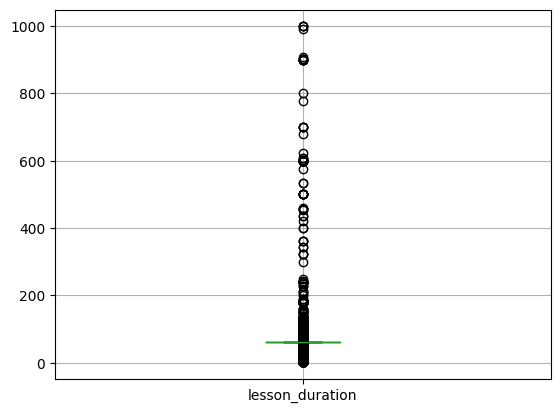

In [38]:
teachers_info.boxplot(column = 'lesson_duration');

Довольно много странных значений продолжительности урока - тут и уроки по 16 часов, и по 0. Пока будем считать, что это плохо заполненные формы.

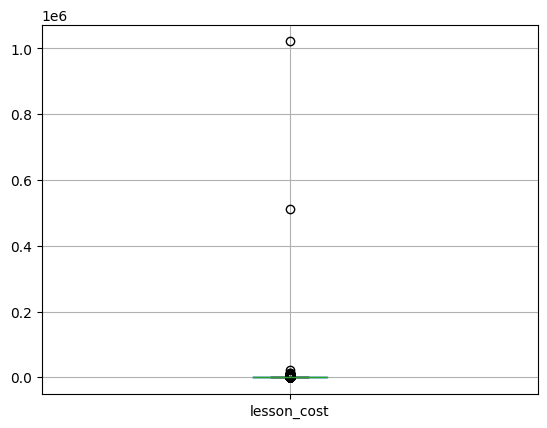

In [39]:
teachers_info.boxplot(column = 'lesson_cost');

Выбросы со стоимостью занятия 510 тыс и более миллиона - это какое-то ошибочное заполнение форм. Пока не будем убирать выбросы. Возможно, неаккуратное заполнение форм будет указывать нам на неэффективного репетитора.

Занятия стоимостью около 25 тыс руб –– это может быть какой-то раскрученный педагог, например блогер, который иногда берет учеников, очень задорого. 

Позже еще посмотрим, сколько они провели уроков, с такими ценниками.

А пока посмотрим поближе медианного репетитора

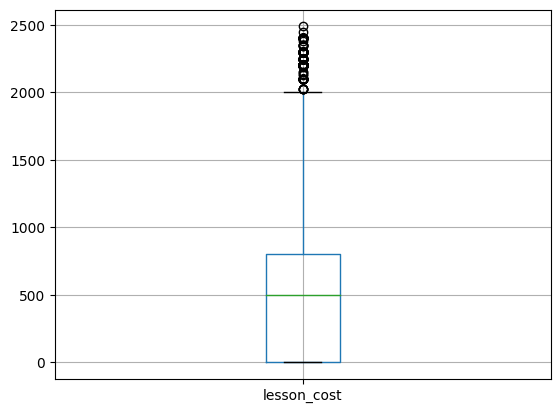

In [51]:
teachers_info[teachers_info['lesson_cost'] < 2500].boxplot(column = 'lesson_cost');

In [52]:
teachers_info[teachers_info['lesson_cost'] == 0].count()

id                         121197
reg_date                   121197
birth_date                 121197
teaching_start_date        121197
is_email_confirmed         121197
lesson_duration            121197
lesson_cost                121197
is_display                 121197
last_visited                87663
is_pupils_needed               28
is_cell_phone_confirmed    121197
area_id                    121197
sex                        121197
orders_allowed             121197
review_num                 121197
dtype: int64

121 тыс уроков со стоимостью 0.

Медианная стоимость урока 500 руб

### 1.2 Статистика по репетиторам и таргет

In [54]:
teachers.sample(8)

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved,blocked
746,207619,8.0,800.000000,8.0,0.010417,8.000000,6400.0,1
33,70215,234.0,3116.883117,77.0,0.095238,38.500000,240000.0,0
37,191796,350.0,1231.368821,263.0,0.205882,37.571429,323850.0,0
845,236579,10.0,700.000000,7.0,0.200000,7.000000,4900.0,0
1305,143941,64.0,2404.166667,60.0,0.126316,2.500000,144250.0,1
1125,47064,27.0,400.000000,4.0,0.500000,4.000000,1600.0,1
191,46490,720.0,1047.564470,349.0,0.250000,20.529412,365600.0,0
688,296118,27.0,1036.538462,26.0,0.125000,8.666667,26950.0,0


In [55]:
teachers.groupby(['blocked']).count()

,id,lessons_delivered,mean_lesson_price,lessons_given,lessons_started_fraction,lessons_per_pupil,money_recieved
blocked,,,,,,,
0,1099,1099,1099,1099,1099,1099,1099
1,557,557,557,557,557,557,557


Довольно много заблокированных репетиторов. Примерно 35%

### 1.3 Информация об учениках


In [56]:
lesson_course.sample(8)

,id,client_id,teacher_id,order_id,lesson_place,lesson_price,is_active,lesson_duration,date_updated,suspend_till_date
394663,1132920,1051293.0,9275,2372410.0,3,1300,0,90,2022-12-16 18:39:06.350,1800-01-01 00:00:00.000
217530,1020102,607252.0,73059,2158281.0,1,2100,1,90,2022-08-31 17:22:15.100,1800-01-01 00:00:00.000
38974,711876,780407.0,221365,1597096.0,4,1000,0,60,2021-02-06 16:56:30.607,1800-01-01 00:00:00.000
577345,1278801,1145945.0,119049,2604876.0,6,900,0,60,2023-05-17 21:15:10.833,1800-01-01 00:00:00.000
538196,855530,866016.0,101311,1844406.0,3,500,1,60,2021-11-13 14:45:39.817,1800-01-01 00:00:00.000
138943,889417,889146.0,156233,1915092.0,5,1500,0,60,2022-01-13 13:59:32.207,1800-01-01 00:00:00.000
337836,1121719,1030839.0,279605,2354604.0,2,500,0,60,2022-12-04 10:32:28.007,1800-01-01 00:00:00.000
49668,673653,751301.0,38099,1522146.0,3,1000,0,60,2020-11-24 12:01:48.317,1800-01-01 00:00:00.000


### 1.4 Занятия

In [57]:
lessons.sample(8)

,id,lesson_course_id,lesson_date,time_from,time_to,home_task,is_regular,amount_to_pay,amount_paid
400512,2461353,513904,2022-05-09 00:00:00.000,16:00:00,17:00:00,NaN,1,NaN,NaN
450515,2568440,858521,2023-05-04 00:00:00.000,20:00:00,21:00:00,NaN,0,NaN,NaN
345616,2338435,923873,2022-03-10 00:00:00.000,18:00:00,19:00:00,NaN,0,1000.0,NaN
304253,2251421,760146,2022-12-12 00:00:00.000,12:51:00,13:50:00,NaN,0,NaN,NaN
666779,3030713,1099007,2022-11-09 00:00:00.000,19:00:00,20:30:00,NaN,0,NaN,NaN
383132,2421550,933484,2022-10-29 00:00:00.000,10:00:00,11:30:00,NaN,0,1200.0,NaN
361823,2374575,759230,2022-11-23 00:00:00.000,14:00:00,14:45:00,NaN,0,800.0,NaN
522490,2738979,981740,2022-12-15 00:00:00.000,18:00:00,19:00:00,NaN,0,900.0,NaN


### 1.5 Цены на заняти репетиторов

In [58]:
teacher_prices.sample(8)

,date_update,teacher_id,subject_id,price,price_external,price_remote
170643,2016-12-20 22:15:57.970,113339.0,1,0,0,0
77028,2013-04-16 13:56:21.250,52375.0,21,2500,3000,1500
18408,2010-04-22 00:29:50.330,12823.0,9,1000,1000,0
402405,2023-04-12 17:35:18.817,285038.0,2,0,0,700
100850,2014-06-30 21:51:16.320,67165.0,8,1000,1000,1000
30731,2010-12-28 21:15:08.343,21962.0,6,500,500,500
392076,2023-01-09 23:20:40.783,282685.0,1,0,0,700
31773,2011-01-26 18:07:15.413,22655.0,2,700,700,700


### 1.6 Заявки

In [60]:
orders.sample(8)

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,...,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
222658,2810669,2023-09-19 15:08:21.427,2.0,Цели: углубленное изучение.\nКатегория ученика...,500,60,None,NaN,Количество занятий в неделю: 1-2.\nВозраст реп...,None,...,0,0,23,2810645.0,1222597,7.0,NaN,None,None,1
88247,1831691,2021-10-21 21:59:14.447,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2021-10-21 21:59:30.507,...,0,0,14,1831658.0,718484,21.0,NaN,1435,2021-11-02 23:43:35.810,1
47041,1888611,2021-12-13 14:52:57.013,2.0,None,0,60,None,NaN,None,None,...,0,0,16,1888603.0,880209,7.0,NaN,None,None,1
13126,2307180,2022-11-08 15:25:39.723,14.0,None,0,60,None,NaN,None,None,...,0,0,16,NaN,778921,14.0,NaN,None,None,1
367948,2211219,2022-09-21 19:12:34.450,11.0,Разделы: вузовский курс.\nКатегория ученика: с...,1000,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-09-23 18:04:35.053,...,0,0,14,2208861.0,842514,10.0,NaN,2700,None,1
402391,2245666,2022-10-08 14:10:57.610,3.0,подготовить к экзамену.\nРазделы:\nобщий курс....,2500,60,None,NaN,Предполагаемое число занятий в неделю: 2.\nОпы...,2022-10-08 16:32:44.987,...,0,0,23,NaN,1007528,17.0,NaN,0,None,1
215450,2803461,2023-09-17 12:44:34.657,2.0,None,0,60,None,NaN,Дополнительная информация:\r\nИзучаемый предме...,None,...,0,0,8,2803395.0,394938,7.0,NaN,None,None,1
19365,1762164,2021-09-09 17:20:52.130,2.0,Разделы: общий курс.\nКатегория ученика: школь...,600,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2021-09-09 20:14:59.307,...,0,0,16,NaN,839878,17.0,NaN,1920,None,1


План работы:

1 Анализ данных 

2 Очистка данных

   2.1 

   2.2 Удаляем выбросы

   2.3 Проверяем дубликаты, пропуски

3 Подготовка данных

<!-- 3.1  Полагаю, можно найти суммарный объем присадок, если нет данных о химических реакциях с выделением/поглощением тепла. Если нет - тоже не страшно, по сути у нас датафреймы с присадками сыпучими и проволокой -  как после работы кодировщика

3.2 назначим признаками начальную температуру, количество инертного газа, суммарное количество присадок, мощность (1 или 2 показателя?) - создание одной таблицы из нескольких. Проверка на мультиколлениарность -->
3.2 Проверка на мультиколлениарность

3.3 выделим целевой признак

3.4 Разделим выборки на обучающую и тестовую

4 Обучим несколько моделей классификации, среди которых будет дамми-модель. Оценим их при помощи кросс-валидации. 

Будем использовать метрику F1.

Сравним результаты. Выберем лучшую модель

5 Протестируем лучшую модель. Вычислим итоговую F1. Проведем анализ важности факторов 


План из ТЗ

* загрузка и ознакомление с данными,
* предварительная обработка и отбор полезных признаков,
* полноценный разведочный анализ,
* разработка новых синтетических признаков,
* отбор финального набора обучающих признаков.
* выбор и обучение моделей,
* итоговая оценка качества предсказания лучшей модели,
* анализ важности ее признаков.
* подготовка отчета по исследованию

